In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [12]:
# Generate data 
np.random.seed(0)

N = 250
D = 2
mean = np.array([[1, 2.5], [0, -2.5]])
cov = [[1.0, -0.7], [-0.7, 1.0]]
X = np.zeros(shape=(2, N))
t = np.zeros([1, N])

for i in range(N):
    _label = np.random.randint(2) # Generate -1, 1 label randomly
    label = 2 * _label - 1
    t[:, i] = label 
    X[:, i] = np.random.multivariate_normal(mean[_label], cov)

# Add bias
X = np.vstack([np.ones(N), X])
X[:, 0]
w = np.random.uniform(-1, 1, D+1)
Eta = 1

In [13]:
# Step function
def f(w, x):
    print(w.shape, x.shape)
    if np.dot(w.T, x) >= 0:
        return 1
    else:
        return -1

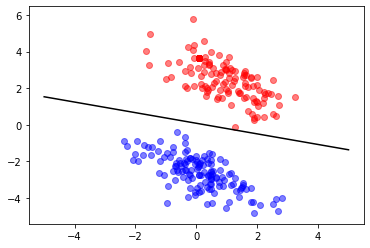

In [14]:


# Stochastic gradient descent
while True:
    index = np.random.permutation(np.arange(0, N))
    
    flag = True
    
    for i in range(N):
        if t[:, index[i]] * np.dot(w.T, X[:, index[i]]) < 0:
            w = w + Eta * X[:, index[i]] * t[:, index[i]]
            flag = False
    
    if flag:
        break

w
x_graph = np.linspace(-5, 5, 2)
y_graph = (-w[1] * x_graph - w[0]) / w[2]
plt.plot(x_graph, y_graph, color="black")

plt.scatter(X[1, np.where(t==1)], X[2, np.where(t==1)], color="blue", alpha=0.5)
plt.scatter(X[1, np.where(t==-1)], X[2, np.where(t==-1)], color="red", alpha=0.5)
plt.show()

In [15]:
w

array([ 0.15071814, -0.50919315, -1.75824978])